In [1]:
from PIL import Image
import numpy as np
import math
image_size = 512
canvas_size = 724
offset = int((canvas_size-image_size)/2)

In [2]:
image = Image.open('lena.jpg')
np_img = np.array(image)
canvas = np.zeros((canvas_size,canvas_size),dtype=int)


for y in range(image_size):
    for x in range(image_size):
        canvas[y+offset][x+offset]=np_img[y][x]


In [3]:
def bilinear(canvas,a):
    rotated_canvas = np.zeros((canvas_size,canvas_size),dtype=int)
    for y in range(canvas_size-1):
        for x in range(canvas_size-1):
            y_p=(x-362)*math.sin(-a) + (y-362)*math.cos(-a) +362
            x_p=(x-362)*math.cos(-a)-(y-362)*math.sin(-a) +362
            #    f=canvas[int(y_p)][int(x_p)]
            if x_p<723 and y_p<723 and x_p>=0 and y_p>=0: 
                y_floor=math.floor(y_p)
                y_ceil=math.ceil(y_p)
                x_floor=math.floor(x_p)
                x_ceil=math.ceil(x_p)
                Q11=[y_floor,math.floor(x_p),canvas[y_floor][x_floor]]
                Q12=[y_ceil,math.floor(x_p),canvas[y_ceil][x_floor]]
                Q21=[y_floor,math.ceil(x_p),canvas[y_floor][x_ceil]]
                Q22=[y_ceil,math.ceil(x_p),canvas[y_ceil][x_ceil]]
    
            #R1 = ((Q21[1]-x)/(Q21[1]-Q11[1]))*Q11[2]+((x-Q11[1])/(Q21[1]-Q11[1]))*Q21[2]
            #R2 = ((Q22[1]-x)/(Q22[1]-Q12[1]))*Q12[2]+((x-Q12[1])/(Q22[1]-Q12[1]))*Q22[2]
                if Q21[1]==Q11[1]:
                    f=Q21[2]
                elif Q12[0]==Q11[0]:
                    f=Q12[2]
                else:
                    R1 = ((Q21[1]-x_p)/(Q21[1]-Q11[1]))*Q11[2]+((x_p-Q11[1])/(Q21[1]-Q11[1]))*Q21[2]
                    R2 = ((Q22[1]-x_p)/(Q22[1]-Q12[1]))*Q12[2]+((x_p-Q12[1])/(Q22[1]-Q12[1]))*Q22[2]
                    f=((Q12[0]-y_p)/(Q12[0]-Q11[0]))*R1+((y_p-Q11[0])/(Q12[0]-Q11[0]))*R2
                rotated_canvas[y][x]=f# ((Q12[0]-y)/(Q12[0]-Q11[0]))*R1+((y-Q11[0])/(Q12[0]-Q11[0]))*R2
    return rotated_canvas




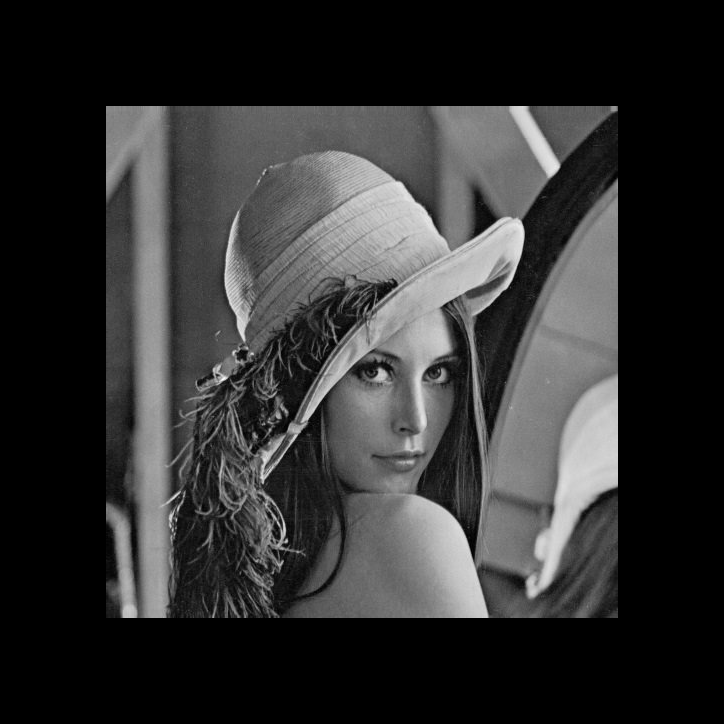

In [4]:
canvas_org=canvas
Image.fromarray(canvas_org.astype('uint8'), 'L')

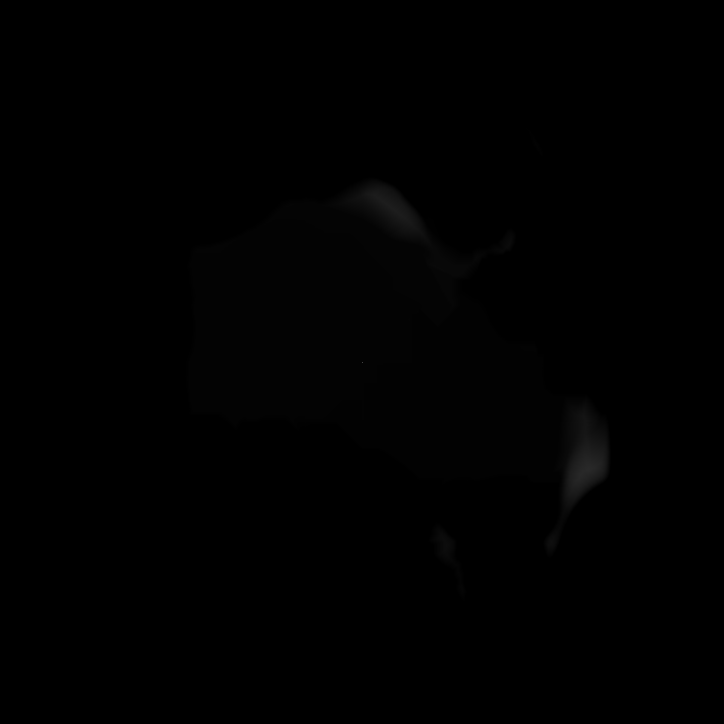

In [5]:
for i in range(360):
    canvas = bilinear(canvas,(1*math.pi)/180)
Image.fromarray(canvas.astype('uint8'), 'L')

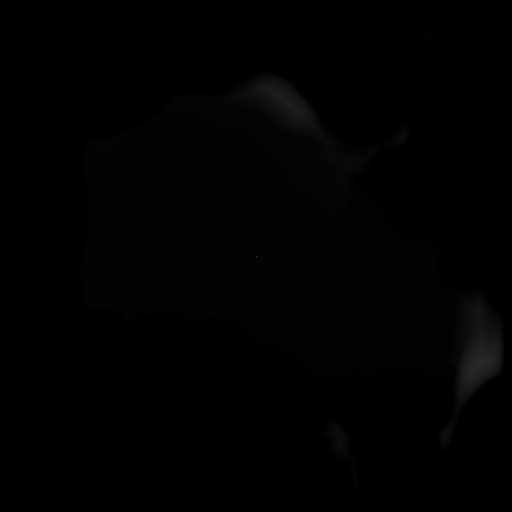

In [7]:
output_img=np.zeros((image_size,image_size),dtype=int)
for y in range(image_size):
    for x in range(image_size):
        output_img[y][x]=canvas[y+offset][x+offset]
Image.fromarray(output_img.astype('uint8'), 'L')

In [6]:
def compare(img1,img2):

    return (np.square(np.subtract(img1,img2)).sum(), np.absolute(np.subtract(img1,img2)).sum())
compare(canvas_org,canvas)

(-1088360586, 25619840)